In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 4.2 MB/s eta 0:00:00a 0:00:01


In [3]:
import os
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager

In [22]:
def get_files(method:str):
    path = f'/workspace/accuracy/{method}/'
    file_list = os.listdir(path)
    file_list_csv = [file for file in file_list if file.endswith('.csv')]
    seeds = []
    pattern = f'{method}_sparse_output_([0-9]+).csv'
    for file in file_list_csv:
        result = re.search(pattern, file)
        seeds.append(result.group(1))
    return path, file_list_csv, seeds

In [28]:
def data_sorting(file_str):
    data = pd.read_csv(file_str)
    data_sorted = data.sort_values(by="sparsity").drop_duplicates(subset=['sparsity'], keep = 'first')
    return data_sorted

In [29]:
def save_graphs(method:str):
    path, file_list, seeds = get_files(method)
    for i in range(len(file_list)):
        data = data_sorting(path+file_list[i])
        sparsity = np.array(data["sparsity"])
        accuracy = np.array(data["accuracy"])
        plt.plot(sparsity,accuracy)
        plt.xlabel("sparsity")
        plt.ylabel("accuracy")
        plt.title(f"{method}_{seeds[i]}")
        plt.savefig(f"{path}{method}_{seeds[i]}.png")
        plt.clf()

In [58]:
def box_graphs(method:str):
    path, file_list, seeds = get_files(method)
    sorted_datas = []
    total_results = []
    for i in range(len(file_list)):
        sorted_datas.append(data_sorting(path+file_list[i]))
    results = pd.concat(sorted_datas)
    sparsitys = list(results['sparsity'].drop_duplicates())

    for i in list(sparsitys):
        total_results.append(list(results['accuracy'][results['sparsity'] == i]))
    plt.boxplot(total_results)
    plt.xticks(range(len(sparsitys)), sparsitys)
    plt.show()

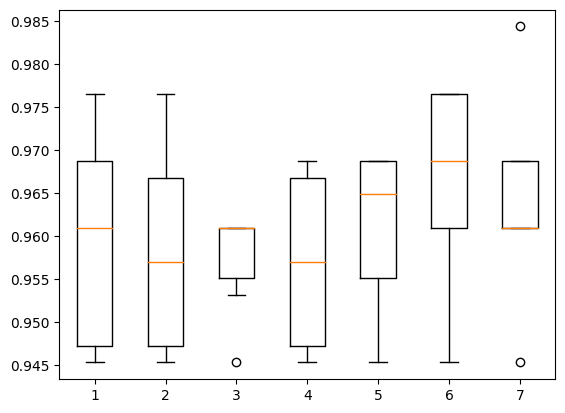

In [53]:
bar_graphs('block')

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]


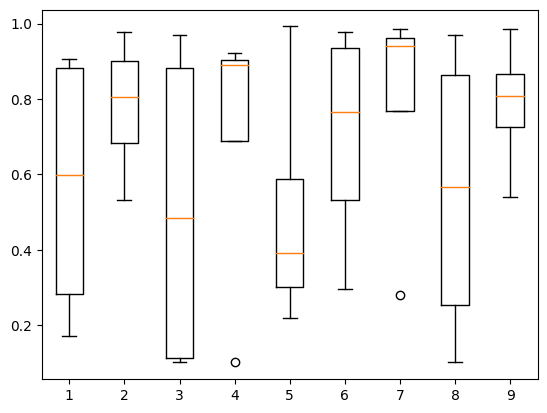

In [57]:
box_graphs('random')

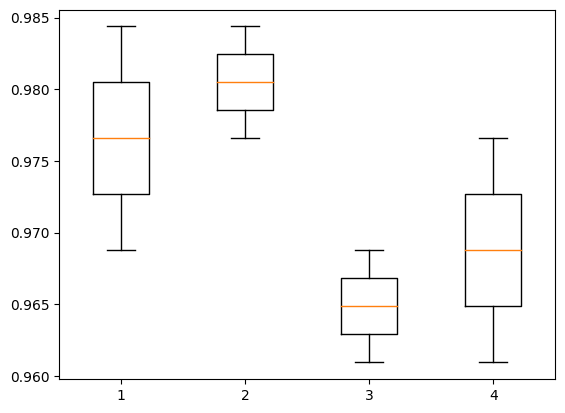

In [55]:
box_graphs('origin')

In [30]:
save_graphs('block')

In [24]:
save_graphs('random')

In [25]:
save_graphs('origin')